<div style="text-align: center;">
  <h1>Comparative Analysis of Bicycle Usage between Annual Members and Casual Users of Cyclistic</h1>
  <h2>Ronaldo Caro</h2>
  <h2>08/04/24</h2>
</div>

<h3>1. Business Task Instruction</h3>
<p><strong>Problem Description:</strong> It has been identified that Cyclistic's annual members generate significantly higher revenue compared to casual users. Therefore, increasing the number of annual subscribers is considered essential for the company's future growth. To achieve this goal, a marketing strategy aimed at converting casual users into annual members is planned. It is crucial to understand the differences in usage behavior between these two groups regarding the use of Cyclistic's bikes.</p>
<p><strong>Analysis Objectives:</strong></p>
<ul>
  <li>Objective 1: Identify the differences between annual members and casual users.</li>
  <li>Objective 2: Determine why casual users would purchase annual memberships.</li>
  <li>Objective 3: Propose recommendations for designing the marketing strategy.</li>
</ul>
<p><strong>Project Scope:</strong></p>
<ul>
  <li>Analysis period: June 2024 to June 2024</li>
  <li>Data to be used: Data provided by Motivate International Inc. <a href="https://www.divvybikes.com/data-license-agreement" target="_blank">(License)</a></li>
  <li>Exclusions: Use of personally identifiable information of cyclists is prohibited.</li>
</ul>
<p><strong>Success Criteria:</strong></p>
<ul>
  <li>Generate a detailed report with a description of the business task, data sources used, documentation of the cleaning and analysis process, along with supporting visualizations and key findings.</li>
  <li>Propose at least three recommendations based on the findings.</li>
</ul>
<hr>

<h3>2. Description of Data Sources</h3>
    <ul>
      <li><strong>Description:</strong> Data from Cyclistic bike trips over the past 12 months, from July 2023 to June 2024, was obtained.</li>
      <li><strong>Data Type:</strong> The data is structured in monthly CSV files. The data provides information about each trip in the following categories: start and end date and time, start and end station, and rider membership type (casual or member). No personal data is stored.</li>
      <li><strong>Source:</strong> Data obtained from the Motivate International Inc. website. <a href="https://divvy-tripdata.s3.amazonaws.com/index.html" target="_blank">(Data Source)</a></li>
      <li><strong>Date of Retrieval:</strong> 08-01-24</li>
    </ul>
<hr>

<h3>3. Data Cleaning and Manipulation Documentation</h3>
<ul>
<li><strong>Tools Used</strong></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ul>
<li><strong>Data Reading:</strong> Each CSV file is stored in a variable with the format month_yy (Example: july_23) as a Pandas DataFrame. All DataFrames are stored in the dictionary total_df.</li>
</ul>

In [2]:
%run read_csv_files.py # basically an read_csv() file .py

In [3]:
total_df = {'Jul 23': july_23, 'Aug 23': august_23, 'Sep 23': sept_23, 'Oct 23': oct_23, 'Nov 23': nov_23, 'Dec 23': dec_23,
           'Jan 24': january_24, 'Feb 24': feb_24, 'Mar 24': mar_24, 'Apr 24': apr_24, 'May 24': may_24, 'Jun 24': jun_24}

In [4]:
july_23.head(6)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member
5,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.884069,-87.656853,41.885779,-87.651025,member


<ul>
<li><strong>Remove Rows with Null Values and Duplicates</strong></li>
</ul>

In [5]:
for value in total_df.values():
    value.dropna(inplace = True)
    value.drop_duplicates(subset = 'ride_id', inplace=True)

<ul>
<li><strong>Format Columns with Time Values to Datetime Type</strong></li>
</ul>

In [6]:
for value in total_df.values():
    value['started_at'] = pd.to_datetime(value['started_at'], format = 'mixed')
    value['ended_at'] = pd.to_datetime(value['ended_at'], format = 'mixed')

<ul>
<li><strong>Add Columns for ride_length and day_of_week</strong> These columns indicate the trip duration and the day of the week when the ride took place.</li>
</ul>

In [7]:
for value in total_df.values():
    value['ride_length'] = value['ended_at'] - value['started_at']
    value['day_of_week'] = value['started_at'].dt.day_name()

<ul>
<li><strong>Store Data in a Single DataFrame and Classify by User</strong></li>
</ul>

In [8]:
total_member = {}
total_casual = {}

for key, value in total_df.items():
    total_member[key] = value[value['member_casual'] == 'member']
    total_casual[key] = value[value['member_casual'] == 'casual']

combined_df = pd.concat(total_df.values(), ignore_index = True)
combined_df.head(6)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30,Sunday
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30,Sunday
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36,Sunday
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56,Friday
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26,Saturday
5,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.884069,-87.656853,41.885779,-87.651025,member,0 days 00:04:54,Monday


In [9]:
member = combined_df[combined_df['member_casual'] == 'member'] # dataframe for only members
casual = combined_df[combined_df['member_casual'] == 'casual'] # dataframe for only casual users

print('{:<10} {:<30}'.format('Number of trips by members: ', len(member)))
print('{:<10} {:<30}'.format('Number of trips by casual users: ', len(casual)))

Number of trips by members:  2770653                       
Number of trips by casual users:  1503695                       


In [10]:
combined_df.to_csv('data_jul2023_jun2024.csv', index= False)
member.to_csv('memberData_jul2023_jun2024.csv', index = False)
casual.to_csv('casualData_jul2023_jun2024.csv', index = False)

<h3>4. Analysis Summary</h3>
<ul>
<li><strong>Average and Maximum Trip Duration for Each Month</strong></li>
</ul>

In [11]:
total_mean_ride_length = {} # average ride_length for each month
total_max_ride_length = {} # ride_length max for each month

for key, value in total_df.items():
    mean_ride_length = value['ride_length'].mean()
    total_mean_ride_length[key] = mean_ride_length
    
    max_ride_length = value['ride_length'].max()
    total_max_ride_length[key] = max_ride_length

mean_ride_length = combined_df["ride_length"].mean() # total average ride_length 
max_ride_length = combined_df["ride_length"].max() # total ride_length max

data_mean_max_ride_length = {'month yy': total_df.keys(), 
                             'mean ride_length': total_mean_ride_length.values(), 
                             'max ride_lenght': total_max_ride_length.values()}
mean_max_ride_length_df = pd.DataFrame(data = data_mean_max_ride_length)
mean_groupBy_day_user = combined_df.groupby(['member_casual', 'day_of_week'])['ride_length'].mean() # average ride_length by user
mean_max_ride_length_df.to_csv('monthly_avg_max_jul2023_jun2024.csv', index = False)
mean_max_ride_length_df

,month yy,mean ride_length,max ride_lenght
0,Jul 23,0 days 00:18:25.285134103,1 days 16:57:51
1,Aug 23,0 days 00:17:43.615741666,4 days 18:51:13
2,Sep 23,0 days 00:16:53.695123708,1 days 00:57:54
3,Oct 23,0 days 00:14:47.305301636,1 days 00:55:34
4,Nov 23,0 days 00:12:50.393860217,1 days 00:57:30
5,Dec 23,0 days 00:12:03.658944735,1 days 00:54:28
6,Jan 24,0 days 00:12:10.440100871,1 days 00:57:19
7,Feb 24,0 days 00:13:24.794723280,1 days 00:57:39
8,Mar 24,0 days 00:14:18.040481504,1 days 01:09:22
9,Apr 24,0 days 00:16:13.395476128,1 days 00:53:33


<ul>
<li><strong>Obtain the Mode of day_of_week</strong></li>
</ul>

In [12]:
total_mode_day_of_week = {} # day_of_week mode for each month

for key, value in total_df.items():
    mode_day_of_week = value['day_of_week'].mode()
    total_mode_day_of_week[key] = mode_day_of_week[0]
    
mode_day_of_week = combined_df['day_of_week'].mode() # total day_of_week mode

data_mode_day = {'month yy': total_mode_day_of_week.keys(), 
                'mode day_of_week': total_mode_day_of_week.values()}
mode_day_df = pd.DataFrame(data = data_mode_day)
mode_day_df.to_csv('monthly_mode_jul2023_jun2024.csv', index = False)
mode_day_df

,month yy,mode day_of_week
0,Jul 23,Saturday
1,Aug 23,Wednesday
2,Sep 23,Saturday
3,Oct 23,Tuesday
4,Nov 23,Thursday
5,Dec 23,Friday
6,Jan 24,Wednesday
7,Feb 24,Thursday
8,Mar 24,Saturday
9,Apr 24,Tuesday


<ul>
<li><strong>Calculate the Average ride_length by User (Member or Casual)</strong></li>
</ul>

In [13]:
total_mean_ride_length_member = {} # average ride_length of members for each month
total_mean_ride_length_casual = {} # average ride_length of casual users for each month

for key, value in total_df.items():
    member = value[value['member_casual'] == 'member']
    casual = value[value['member_casual'] == 'casual']

    mean_ride_length_member = member['ride_length'].mean()
    mean_ride_length_casual = casual['ride_length'].mean()

    total_mean_ride_length_member[key] = mean_ride_length_member
    total_mean_ride_length_casual[key] = mean_ride_length_casual
    

member = combined_df[combined_df['member_casual'] == 'member'] # dataframe for only members
casual = combined_df[combined_df['member_casual'] == 'casual'] # dataframe for only casual users

mean_ride_length_member = member['ride_length'].mean() # total average ride_length for only members
mean_ride_length_casual = casual['ride_length'].mean() # total average ride_length solo for only casual users

data_mean_ride_usur = {'month yy': total_df.keys(),
                      'mean ride_length by member': total_mean_ride_length_member.values(),
                      'mean ride_length by casual': total_mean_ride_length_casual.values()}
mean_ride_usur_df = pd.DataFrame(data = data_mean_ride_usur)
mean_ride_usur_df.to_csv('monthly_avg_user_jul2023_jun2024.csv', index = False)
mean_ride_usur_df

,month yy,mean ride_length by member,mean ride_length by casual
0,Jul 23,0 days 00:13:21.023373414,0 days 00:25:12.958731155
1,Aug 23,0 days 00:13:18.660784531,0 days 00:24:21.364279727
2,Sep 23,0 days 00:12:40.363463159,0 days 00:23:31.988561361
3,Oct 23,0 days 00:11:38.876960373,0 days 00:21:22.789347659
4,Nov 23,0 days 00:11:03.076570909,0 days 00:17:52.116842587
5,Dec 23,0 days 00:10:48.180220302,0 days 00:16:32.064547783
6,Jan 24,0 days 00:11:33.252167126,0 days 00:15:32.188787895
7,Feb 24,0 days 00:11:44.622211154,0 days 00:19:49.439324076
8,Mar 24,0 days 00:11:24.068602686,0 days 00:22:01.783639228
9,Apr 24,0 days 00:12:17.019401140,0 days 00:24:46.320286553


<ul>
<li><strong>Trips by User (Member or Casual) by day_of_week</strong></li>
</ul>

In [14]:
total_trips_member_by_day = {}
total_trips_casual_by_day = {}

for key in total_df.keys():
    count_trips_by_months_member =  total_member[key].groupby('day_of_week')['day_of_week'].count()
    count_trips_by_months_casual =  total_casual[key].groupby('day_of_week')['day_of_week'].count()

    total_trips_casual_by_day[key] = np.array(count_trips_by_months_casual.values)
    total_trips_member_by_day[key] = np.array(count_trips_by_months_member.values)

    days = list(count_trips_by_months_member.index) 

In [15]:
total_group_trips_member = {'Day': days}

for month, values in total_trips_member_by_day.items():
    total_group_trips_member[month] = values

count_trips_by_months_member_df = pd.DataFrame(data = total_group_trips_member)
count_trips_by_months_member_df['sum'] = count_trips_by_months_member_df.iloc[:, 1:].sum(axis=1)
print('\t\t\tNumber of member rides per week day')
count_trips_by_months_member_df.to_csv('monthly_MemberTrips_byDay_jul2023_jun2024.csv', index = False)
count_trips_by_months_member_df

			Number of member rides per week day


,Day,Jul 23,Aug 23,Sep 23,Oct 23,Nov 23,Dec 23,Jan 24,Feb 24,Mar 24,Apr 24,May 24,Jun 24,sum
0,Friday,44016,47772,53516,32413,25594,21933,10813,19353,21453,24442,46049,38057,385411
1,Monday,56927,40359,33835,46333,28933,16836,15889,21644,25785,37066,32298,39202,395107
2,Saturday,48368,39918,51790,26528,22704,17065,7528,11833,24022,26468,35485,38250,349959
3,Sunday,42922,36514,34183,34719,19451,13512,7100,14064,19626,22384,27512,41800,313787
4,Thursday,49593,58931,47835,38272,38983,21708,18042,29874,23314,26509,44729,43205,440995
5,Tuesday,45832,64348,41614,52625,29959,17962,15422,25891,27163,40335,35115,41147,437413
6,Wednesday,41006,63221,46898,42591,37077,21441,21301,23907,26094,26650,53497,44298,447981


In [16]:
total_group_trips_casual = {'Day': days}

for month, values in total_trips_casual_by_day.items():
    total_group_trips_casual[month] = values

count_trips_by_months_casual_df = pd.DataFrame(data = total_group_trips_casual)
count_trips_by_months_casual_df['sum'] = count_trips_by_months_casual_df.iloc[:, 1:].sum(axis=1)
print('\t\t\tNumber of casual user rides per week day')
count_trips_by_months_casual_df.to_csv('monthly_CasualTrips_byDay_jul2023_jun2024.csv', index = False)
count_trips_by_months_casual_df

			Number of casual user rides per week day


,Day,Jul 23,Aug 23,Sep 23,Oct 23,Nov 23,Dec 23,Jan 24,Feb 24,Mar 24,Apr 24,May 24,Jun 24,sum
0,Friday,31938,36358,33726,14984,9482,6678,2234,5289,7316,9992,28189,27353,213539
1,Monday,36434,20250,19707,18015,7961,3537,2862,5160,8024,14304,18032,21290,175576
2,Saturday,53369,42549,52519,18832,13802,6931,1857,4188,15270,22572,37588,42021,311498
3,Sunday,44948,35840,33843,27846,10451,5313,1751,5950,11616,18612,26026,46209,268405
4,Thursday,28368,33429,20948,14102,12959,5414,3176,6432,6334,7389,19998,24207,182756
5,Tuesday,29764,31699,16939,19851,7577,3786,2514,6064,7543,13374,13977,20627,173715
6,Wednesday,20473,33731,19282,16670,9865,5027,3319,5087,6718,7701,23673,26660,178206


<h3>5. Visualizations and Key Findings</h3>
<ul>
<li><strong>Comparison of Trip Duration by User Type</strong></li>
    <p>The average trip duration for casual users decreases each month during the second half of 2023 and starts to increase again each month in the first half of 2024. This trend is slightly noticeable for members, but not significantly.</p>
</ul>

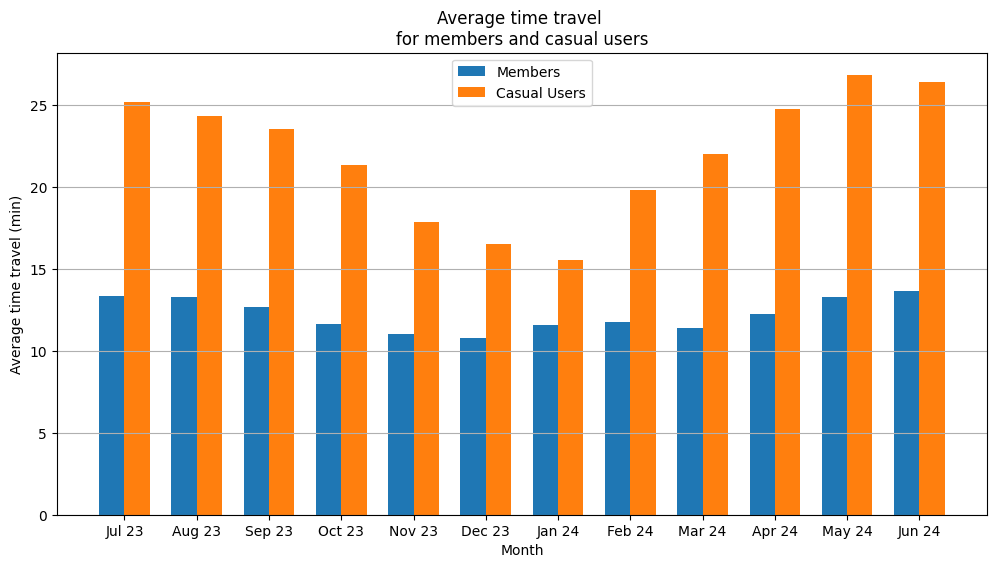

In [17]:
x = ['Jul 23', 'Aug 23', 'Sep 23', 'Oct 23', 'Nov 23', 'Dec 23', 
     'Jan 24', 'Feb 24', 'Mar 24', 'Apr 24', 'May 24', 'Jun 24']
y_member = [time.total_seconds() / 60 for time in total_mean_ride_length_member.values()]
y_casual = [time.total_seconds() / 60 for time in total_mean_ride_length_casual.values()]

n = len(x)
bar_width = 0.35 
index = np.arange(n)  

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width/2, y_member, bar_width, label='Members')
plt.bar(index + bar_width/2, y_casual, bar_width, label='Casual Users')

plt.xlabel('Month')
plt.ylabel('Average time travel (min)')
plt.title('Average time travel \nfor members and casual users')
plt.xticks(index, x)
plt.legend()

plt.grid(axis='y')  
plt.savefig('average_time_travel_members_vs_casual_users.png')
plt.show()

<ul>
<li><strong>Preferred Bike Types Among Users</strong></li>
    <p>Both members and casual users mostly prefer classic bikes over electric ones. However, a higher percentage of trips made by casual users were on electric bikes (34.1%) compared to members (31.9%).</p>
</ul>

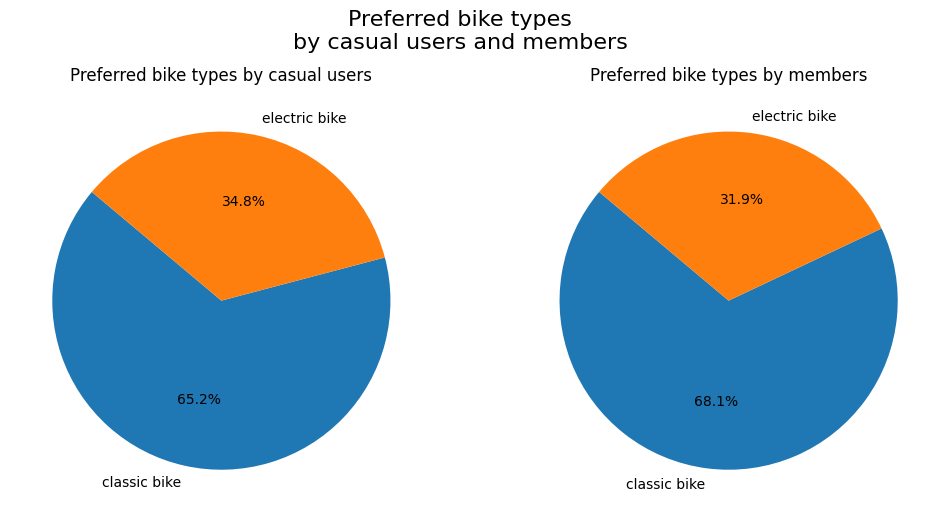

In [18]:
x1 = ['classic bike', 'electric bike']
x2  = ['classic bike', 'electric bike']

y_casual = casual[casual['rideable_type'] != 'docked_bike'].groupby('rideable_type')['rideable_type'].count()
y_member = member.groupby('rideable_type')['rideable_type'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Preferred bike types\nby casual users and members', fontsize=16)

ax1.set_title('Preferred bike types by casual users')
ax1.pie(y_casual, labels=x1, autopct='%1.1f%%', startangle=140)

ax2.set_title('Preferred bike types by members')
ax2.pie(y_member, labels=x2, autopct='%1.1f%%', startangle=140)

plt.savefig('preferred_bike_types_casual_vs_members.png')

<ul>
<li><strong>Days with Highest User Traffic</strong></li>
    <p>There is higher traffic from casual users during weekends. In comparison, members have lower traffic on weekends, although their usage is more evenly distributed throughout the week.</p>
</ul>

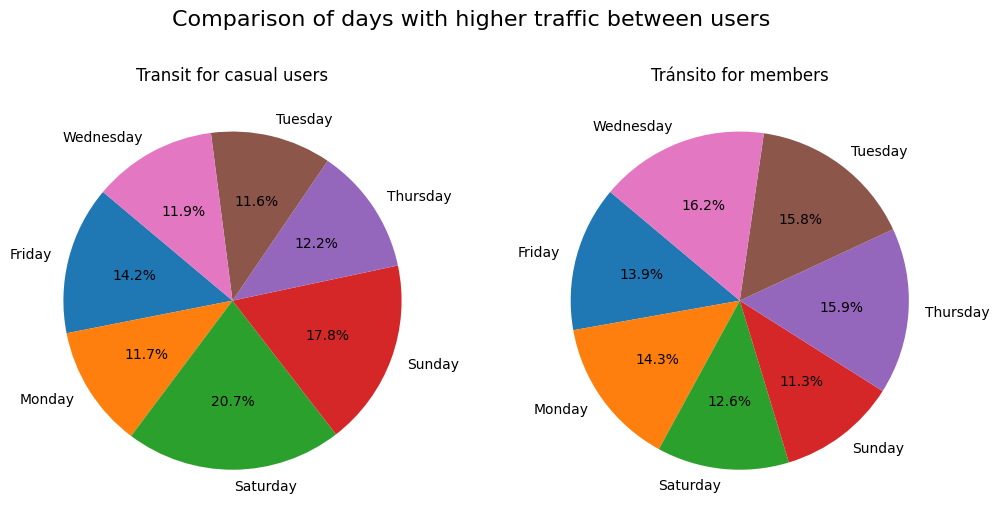

In [19]:
x_casual = np.array(count_trips_by_months_casual_df['Day'])
y_casual = np.array(count_trips_by_months_casual_df['sum'])

x_member = np.array(count_trips_by_months_member_df['Day'])
y_member = np.array(count_trips_by_months_member_df['sum'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Comparison of days with higher traffic between users', fontsize=16)

ax1.pie(y_casual, labels=x_casual, autopct='%1.1f%%', startangle=140)
ax1.set_title('Transit for casual users')
ax2.pie(y_member, labels=x_member, autopct='%1.1f%%', startangle=140)
ax2.set_title('Tránsito for members')

plt.savefig('comparison_days_higher_traffic_users.png')
plt.show()

<h3>6. Conclusions and Recommendations</h3>
<p>The findings indicate that members use bikes almost daily, maintaining consistent usage throughout the year, regardless of the season. In contrast, there is a decrease in the number of casual users during winter. Therefore, our recommendations will focus on promoting the idea that bikes are a viable transportation alternative in any season of the year.</p>
<p><strong>Recommendation 1: </strong>Include incentives such as reduced rates or the option to freeze the membership for a specific period at no additional cost.</p>
<ul>
  <li>Justification: Freezing the membership or offering reduced rates provides greater flexibility to users, especially for those who might have concerns about continuous use during adverse weather conditions or personal situations that may limit their usage.</li>
</ul>
<p><strong>Recommendation 2: </strong>Share stories and testimonials from members who use bikes year-round</p>
<ul>
  <li>Justification: Stories from members who use bikes throughout the year can inspire and motivate casual users to consider more regular use, regardless of the season. Sharing real member stories and testimonials adds a layer of authenticity and credibility.</li>
</ul>
<p><strong>Recommendation 3: </strong>Promote the Benefits of Electric Bikes</p>
<ul>
  <li>Justification: To encourage users to try electric bikes or to motivate those already interested to acquire a membership, it is recommended to highlight their advantages, such as ease of covering long distances, tackling difficult terrains with less effort, and handling adverse weather conditions.</li>
</ul>
<hr>